# Running MAE on VIIRS data

In [23]:
# imports
from importlib import reload
import os
import numpy as np

import h5py

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from ulmo import io as ulmo_io
from ulmo.utils import image_utils
from ulmo.plotting import plotting
#from ulmo.mae import reconstruct_LLC

# Load VIIRS Table

In [2]:
sst_path = '/media/xavier/Samsung 8TB/Oceanography/SST'

In [4]:
viirs_file = os.path.join(sst_path, 'VIIRS', 'Tables', 'VIIRS_all_98clear_std.parquet')
viirs = ulmo_io.load_main_table(viirs_file)

Read main table: /media/xavier/Samsung 8TB/Oceanography/SST/VIIRS/Tables/VIIRS_all_98clear_std.parquet


In [5]:
viirs.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,...,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL,MODIS_LL,UID
0,s3://viirs/data/2012/032/20120201001000-OSPO-L...,3024,2784,19.337208,-176.89246,0.014025,192,2012-02-01 00:10:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,32205,0,26.662079,25.100006,27.660004,26.920013,26.429993,481.689453,486.260010,13281093372310754
1,s3://viirs/data/2012/032/20120201001000-OSPO-L...,3120,2688,20.116112,-176.30530,0.013943,192,2012-02-01 00:10:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,252131,0,26.312477,24.450012,27.149994,26.670013,25.809998,360.780640,379.500183,13281101161369470
2,s3://viirs/data/2012/032/20120201001000-OSPO-L...,3216,2496,21.009575,-175.17024,0.004693,192,2012-02-01 00:10:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,459126,0,26.149899,25.119995,26.790009,26.359985,25.950012,496.087891,482.765015,13281110096482976
3,s3://viirs/data/2012/032/20120201001000-OSPO-L...,3216,2592,20.876402,-175.80142,0.002740,192,2012-02-01 00:10:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,379958,0,26.039507,24.489990,26.889984,26.309998,25.829987,454.589905,493.697144,13281108764419858
4,s3://viirs/data/2012/032/20120201001000-OSPO-L...,3216,2688,20.725744,-176.50098,0.006565,192,2012-02-01 00:10:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,217941,0,25.925251,23.980011,27.029999,26.359985,25.609985,326.442383,328.781921,13281107257349902


# Find completely clear

In [7]:
all_clear = np.isclose(viirs.clear_fraction, 0.)
np.sum(all_clear)

923751

In [8]:
clear_viirs = viirs[all_clear].copy()

In [9]:
clear_viirs.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,...,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL,MODIS_LL,UID
23,s3://viirs/data/2012/032/20120201013000-OSPO-L...,4272,192,-42.767250,-159.981770,1.463673e-16,192,2012-02-01 01:30:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,337702,0,16.150503,15.179993,17.429993,16.450012,15.670013,281.213318,305.681091,13284723282001823
24,s3://viirs/data/2012/032/20120201013000-OSPO-L...,4272,288,-43.076412,-161.011410,1.463673e-16,192,2012-02-01 01:30:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,492942,0,16.179958,15.399994,16.859985,16.420013,15.820007,502.220459,536.932861,13284692361898859
36,s3://viirs/data/2012/032/20120201023000-OSPO-L...,240,2496,37.592620,0.868959,-2.904803e-16,192,2012-02-01 02:30:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,710805,0,15.348452,14.250000,15.820007,15.570007,15.170013,456.507751,496.759888,1328127592618086896
37,s3://viirs/data/2012/032/20120201023000-OSPO-L...,240,2592,37.404587,1.596744,-2.904803e-16,192,2012-02-01 02:30:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,144083,0,15.289324,13.559998,16.130005,15.489990,15.109985,501.634094,532.935547,1328127404618159674
40,s3://viirs/data/2012/032/20120201023000-OSPO-L...,816,1728,35.628773,-8.543817,1.587376e-15,192,2012-02-01 02:30:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,71629,0,16.646990,15.769989,17.160004,16.910004,16.350006,382.582520,442.877380,1328125628817145618


# Let's check a few

## 2012

In [19]:
ex_file = os.path.join(sst_path, 'VIIRS', 'Extractions', 'VIIRS_2012_95clear_192x192_inpaint.h5')
pp_file = os.path.join(sst_path, 'VIIRS', 'PreProc', 'VIIRS_2012_95clear_192x192_preproc_viirs_std.h5')

In [21]:
f_pp2012 = h5py.File(pp_file, 'r')

In [17]:
f_ex2012 = h5py.File(ex_file, 'r')

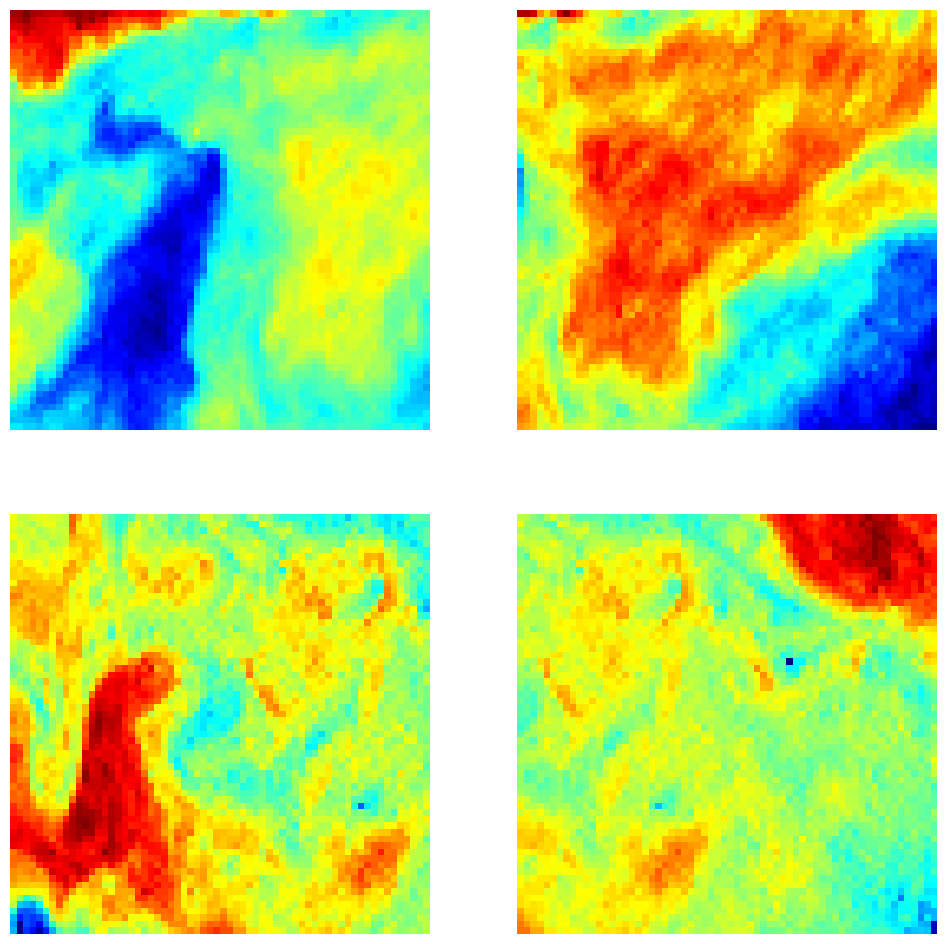

In [26]:
reload(plotting)
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2,2)

for ss in range(4):
    # Axis
    ax = plt.subplot(gs[ss])
    # Img
    cutout = clear_viirs.iloc[ss]
    img, _ = image_utils.grab_image(cutout, pp_hf=f_pp2012, close=False)
    # Plot
    plotting.show_image(img, ax=ax, set_aspect='equal', cbar=False)

# 
plt.show()
